In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

In [2]:
import scvi

Global seed set to 0
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [3]:
atac = sc.read('atac-emb.h5ad')
rna = sc.read('rna-emb.h5ad')

In [4]:
temp = ad.AnnData(atac.obsm['ATAC_gene_activity'].A)
temp.var_names = atac.uns['ATAC_gene_activity_var_names']
temp.obs_names = atac.obs_names
temp.obs['cell_type'] = atac.obs['cell_type']
temp

AnnData object with n_obs × n_vars = 6224 × 19039
    obs: 'cell_type'

In [5]:
temp2 = ad.AnnData(rna.layers['counts'].A)
temp2.var_names = rna.var_names
temp2.obs_names = rna.obs_names
temp2.obs['cell_type'] = rna.obs['cell_type']
temp2

AnnData object with n_obs × n_vars = 6224 × 7509
    obs: 'cell_type'

In [6]:
lst_var_names = list(set(temp2.var_names) & set(temp.var_names))

In [7]:
temp = temp[:,lst_var_names]
temp2 = temp2[:,lst_var_names]

### Dataset concatenation

In [8]:
adata = temp2.concatenate(temp)

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [9]:
adata.layers["counts"] = adata.X.copy()

In [11]:
#sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [12]:
adata.raw = adata  # keep full dimension safe

In [13]:
sc.pp.highly_variable_genes(adata, subset=True,batch_key="batch")

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


In [14]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

In [15]:
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30)

In [16]:
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/400:   0%|          | 1/400 [00:05<34:45,  5.23s/it, loss=866, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/400:   0%|          | 2/400 [00:06<18:12,  2.75s/it, loss=840, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/400:   1%|          | 3/400 [00:07<12:53,  1.95s/it, loss=832, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/400:   1%|          | 4/400 [00:08<10:22,  1.57s/it, loss=822, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/400:   1%|▏         | 5/400 [00:09<08:58,  1.36s/it, loss=819, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/400:   2%|▏         | 6/400 [00:10<08:06,  1.24s/it, loss=809, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/400:   2%|▏         | 7/400 [00:11<07:34,  1.16s/it, loss=802, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/400:   2%|▏         | 8/400 [00:12<07:12,  1.10s/it, loss=798, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/400:   2%|▏         | 9/400 [00:13<06:58,  1.07s/it, loss=794, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/400:   2%|▎         | 10/400 [00:14<06:48,  1.05s/it, loss=791, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/400:   3%|▎         | 11/400 [00:15<06:41,  1.03s/it, loss=794, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/400:   3%|▎         | 12/400 [00:16<06:36,  1.02s/it, loss=791, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/400:   3%|▎         | 13/400 [00:17<06:31,  1.01s/it, loss=788, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/400:   4%|▎         | 14/400 [00:18<06:28,  1.01s/it, loss=783, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/400:   4%|▍         | 15/400 [00:19<06:26,  1.00s/it, loss=783, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/400:   4%|▍         | 16/400 [00:20<06:24,  1.00s/it, loss=783, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/400:   4%|▍         | 17/400 [00:21<06:22,  1.00it/s, loss=778, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/400:   4%|▍         | 18/400 [00:22<06:20,  1.00it/s, loss=776, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/400:   5%|▍         | 19/400 [00:23<06:19,  1.00it/s, loss=778, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 21/400:   5%|▌         | 20/400 [00:24<06:17,  1.01it/s, loss=767, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 22/400:   5%|▌         | 21/400 [00:25<06:15,  1.01it/s, loss=776, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 23/400:   6%|▌         | 22/400 [00:26<06:16,  1.01it/s, loss=765, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/400:   6%|▌         | 23/400 [00:27<06:14,  1.01it/s, loss=767, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 25/400:   6%|▌         | 24/400 [00:28<06:13,  1.01it/s, loss=763, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 26/400:   6%|▋         | 25/400 [00:29<06:12,  1.01it/s, loss=760, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 27/400:   6%|▋         | 26/400 [00:30<06:11,  1.01it/s, loss=765, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 28/400:   7%|▋         | 27/400 [00:31<06:08,  1.01it/s, loss=757, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 29/400:   7%|▋         | 28/400 [00:32<06:07,  1.01it/s, loss=759, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 30/400:   7%|▋         | 29/400 [00:33<06:05,  1.01it/s, loss=762, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 31/400:   8%|▊         | 30/400 [00:34<06:05,  1.01it/s, loss=760, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 32/400:   8%|▊         | 31/400 [00:35<06:05,  1.01it/s, loss=762, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 33/400:   8%|▊         | 32/400 [00:36<06:04,  1.01it/s, loss=759, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 34/400:   8%|▊         | 33/400 [00:37<06:02,  1.01it/s, loss=755, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 35/400:   8%|▊         | 34/400 [00:37<06:02,  1.01it/s, loss=752, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 36/400:   9%|▉         | 35/400 [00:38<06:01,  1.01it/s, loss=757, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 37/400:   9%|▉         | 36/400 [00:39<05:59,  1.01it/s, loss=751, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 38/400:   9%|▉         | 37/400 [00:40<05:58,  1.01it/s, loss=758, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 39/400:  10%|▉         | 38/400 [00:41<05:58,  1.01it/s, loss=754, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 40/400:  10%|▉         | 39/400 [00:42<05:57,  1.01it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 41/400:  10%|█         | 40/400 [00:43<05:55,  1.01it/s, loss=751, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 42/400:  10%|█         | 41/400 [00:44<05:53,  1.02it/s, loss=753, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 43/400:  10%|█         | 42/400 [00:45<05:52,  1.02it/s, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 44/400:  11%|█         | 43/400 [00:46<05:51,  1.02it/s, loss=754, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/400:  11%|█         | 44/400 [00:47<05:50,  1.02it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 46/400:  11%|█▏        | 45/400 [00:48<05:49,  1.02it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 47/400:  12%|█▏        | 46/400 [00:49<05:48,  1.02it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 48/400:  12%|█▏        | 47/400 [00:50<05:47,  1.02it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 49/400:  12%|█▏        | 48/400 [00:51<05:46,  1.02it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 50/400:  12%|█▏        | 49/400 [00:52<05:45,  1.02it/s, loss=752, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 51/400:  12%|█▎        | 50/400 [00:53<05:44,  1.02it/s, loss=751, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 52/400:  13%|█▎        | 51/400 [00:54<05:43,  1.02it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 53/400:  13%|█▎        | 52/400 [00:55<05:41,  1.02it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 54/400:  13%|█▎        | 53/400 [00:56<05:41,  1.02it/s, loss=754, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 55/400:  14%|█▎        | 54/400 [00:57<05:40,  1.02it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 56/400:  14%|█▍        | 55/400 [00:58<05:40,  1.01it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 57/400:  14%|█▍        | 56/400 [00:59<05:38,  1.02it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 58/400:  14%|█▍        | 57/400 [01:00<05:39,  1.01it/s, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 59/400:  14%|█▍        | 58/400 [01:01<05:39,  1.01it/s, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 60/400:  15%|█▍        | 59/400 [01:02<05:39,  1.01it/s, loss=749, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 61/400:  15%|█▌        | 60/400 [01:03<05:38,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 62/400:  15%|█▌        | 61/400 [01:04<05:37,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 63/400:  16%|█▌        | 62/400 [01:05<05:37,  1.00it/s, loss=754, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 64/400:  16%|█▌        | 63/400 [01:06<05:37,  1.00s/it, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 65/400:  16%|█▌        | 64/400 [01:07<05:36,  1.00s/it, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 66/400:  16%|█▋        | 65/400 [01:08<05:35,  1.00s/it, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 67/400:  16%|█▋        | 66/400 [01:09<05:35,  1.00s/it, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 68/400:  17%|█▋        | 67/400 [01:10<05:33,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 69/400:  17%|█▋        | 68/400 [01:11<05:32,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 70/400:  17%|█▋        | 69/400 [01:12<05:30,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 71/400:  18%|█▊        | 70/400 [01:13<05:30,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 72/400:  18%|█▊        | 71/400 [01:14<05:29,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 73/400:  18%|█▊        | 72/400 [01:15<05:29,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 74/400:  18%|█▊        | 73/400 [01:16<05:28,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 75/400:  18%|█▊        | 74/400 [01:17<05:26,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 76/400:  19%|█▉        | 75/400 [01:18<05:25,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 77/400:  19%|█▉        | 76/400 [01:19<05:24,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 78/400:  19%|█▉        | 77/400 [01:20<05:23,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 79/400:  20%|█▉        | 78/400 [01:21<05:22,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 80/400:  20%|█▉        | 79/400 [01:22<05:21,  1.00s/it, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 81/400:  20%|██        | 80/400 [01:23<05:20,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 82/400:  20%|██        | 81/400 [01:24<05:18,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 83/400:  20%|██        | 82/400 [01:25<05:17,  1.00it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 84/400:  21%|██        | 83/400 [01:26<05:17,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 85/400:  21%|██        | 84/400 [01:27<05:16,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 86/400:  21%|██▏       | 85/400 [01:28<05:15,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 87/400:  22%|██▏       | 86/400 [01:29<05:14,  1.00s/it, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 88/400:  22%|██▏       | 87/400 [01:30<05:13,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 89/400:  22%|██▏       | 88/400 [01:31<05:13,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 90/400:  22%|██▏       | 89/400 [01:32<05:11,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 91/400:  22%|██▎       | 90/400 [01:33<05:10,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 92/400:  23%|██▎       | 91/400 [01:34<05:09,  1.00s/it, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 93/400:  23%|██▎       | 92/400 [01:35<05:07,  1.00it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 94/400:  23%|██▎       | 93/400 [01:36<05:06,  1.00it/s, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 95/400:  24%|██▎       | 94/400 [01:37<05:05,  1.00it/s, loss=753, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 96/400:  24%|██▍       | 95/400 [01:38<05:05,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 97/400:  24%|██▍       | 96/400 [01:39<05:04,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 98/400:  24%|██▍       | 97/400 [01:40<05:03,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 99/400:  24%|██▍       | 98/400 [01:41<05:02,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/400:  25%|██▍       | 99/400 [01:42<05:01,  1.00s/it, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 101/400:  25%|██▌       | 100/400 [01:43<05:00,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 102/400:  25%|██▌       | 101/400 [01:44<04:59,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 103/400:  26%|██▌       | 102/400 [01:45<04:58,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 104/400:  26%|██▌       | 103/400 [01:46<04:57,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 105/400:  26%|██▌       | 104/400 [01:47<04:56,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 106/400:  26%|██▋       | 105/400 [01:48<04:55,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 107/400:  26%|██▋       | 106/400 [01:49<04:55,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 108/400:  27%|██▋       | 107/400 [01:50<04:53,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 109/400:  27%|██▋       | 108/400 [01:51<04:53,  1.01s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 110/400:  27%|██▋       | 109/400 [01:52<04:52,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 111/400:  28%|██▊       | 110/400 [01:53<04:50,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 112/400:  28%|██▊       | 111/400 [01:54<04:49,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 113/400:  28%|██▊       | 112/400 [01:55<04:48,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 114/400:  28%|██▊       | 113/400 [01:56<04:47,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 115/400:  28%|██▊       | 114/400 [01:57<04:46,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 116/400:  29%|██▉       | 115/400 [01:58<04:46,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 117/400:  29%|██▉       | 116/400 [01:59<04:46,  1.01s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 118/400:  29%|██▉       | 117/400 [02:00<04:44,  1.01s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 119/400:  30%|██▉       | 118/400 [02:01<04:43,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 120/400:  30%|██▉       | 119/400 [02:02<04:42,  1.01s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 121/400:  30%|███       | 120/400 [02:03<04:41,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 122/400:  30%|███       | 121/400 [02:04<04:39,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 123/400:  30%|███       | 122/400 [02:05<04:38,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 124/400:  31%|███       | 123/400 [02:06<04:40,  1.01s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 125/400:  31%|███       | 124/400 [02:07<04:38,  1.01s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 126/400:  31%|███▏      | 125/400 [02:08<04:37,  1.01s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 127/400:  32%|███▏      | 126/400 [02:09<04:35,  1.01s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 128/400:  32%|███▏      | 127/400 [02:10<04:34,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 129/400:  32%|███▏      | 128/400 [02:11<04:34,  1.01s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 130/400:  32%|███▏      | 129/400 [02:12<04:34,  1.01s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 131/400:  32%|███▎      | 130/400 [02:13<04:33,  1.01s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 132/400:  33%|███▎      | 131/400 [02:14<04:31,  1.01s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 133/400:  33%|███▎      | 132/400 [02:15<04:29,  1.01s/it, loss=732, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 134/400:  33%|███▎      | 133/400 [02:16<04:28,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 135/400:  34%|███▎      | 134/400 [02:17<04:27,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 136/400:  34%|███▍      | 135/400 [02:18<04:26,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 137/400:  34%|███▍      | 136/400 [02:19<04:24,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 138/400:  34%|███▍      | 137/400 [02:20<04:23,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 139/400:  34%|███▍      | 138/400 [02:21<04:22,  1.00s/it, loss=735, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 140/400:  35%|███▍      | 139/400 [02:22<04:20,  1.00it/s, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 141/400:  35%|███▌      | 140/400 [02:23<04:19,  1.00it/s, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 142/400:  35%|███▌      | 141/400 [02:24<04:18,  1.00it/s, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 143/400:  36%|███▌      | 142/400 [02:25<04:17,  1.00it/s, loss=728, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 144/400:  36%|███▌      | 143/400 [02:26<04:16,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 145/400:  36%|███▌      | 144/400 [02:27<04:15,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 146/400:  36%|███▋      | 145/400 [02:28<04:14,  1.00it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 147/400:  36%|███▋      | 146/400 [02:29<04:13,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 148/400:  37%|███▋      | 147/400 [02:30<04:12,  1.00it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 149/400:  37%|███▋      | 148/400 [02:31<04:11,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 150/400:  37%|███▋      | 149/400 [02:32<04:10,  1.00it/s, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 151/400:  38%|███▊      | 150/400 [02:33<04:09,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 152/400:  38%|███▊      | 151/400 [02:34<04:08,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 153/400:  38%|███▊      | 152/400 [02:35<04:07,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 154/400:  38%|███▊      | 153/400 [02:36<04:08,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 155/400:  38%|███▊      | 154/400 [02:37<04:06,  1.00s/it, loss=734, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 156/400:  39%|███▉      | 155/400 [02:38<04:05,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 157/400:  39%|███▉      | 156/400 [02:39<04:04,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 158/400:  39%|███▉      | 157/400 [02:40<04:03,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 159/400:  40%|███▉      | 158/400 [02:41<04:02,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 160/400:  40%|███▉      | 159/400 [02:42<04:01,  1.00s/it, loss=733, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 161/400:  40%|████      | 160/400 [02:43<04:00,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 162/400:  40%|████      | 161/400 [02:44<03:58,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 163/400:  40%|████      | 162/400 [02:45<03:58,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 164/400:  41%|████      | 163/400 [02:46<03:56,  1.00it/s, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 165/400:  41%|████      | 164/400 [02:47<03:55,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 166/400:  41%|████▏     | 165/400 [02:48<03:54,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 167/400:  42%|████▏     | 166/400 [02:49<03:53,  1.00it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 168/400:  42%|████▏     | 167/400 [02:50<03:52,  1.00it/s, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 169/400:  42%|████▏     | 168/400 [02:51<03:52,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 170/400:  42%|████▏     | 169/400 [02:52<03:50,  1.00it/s, loss=734, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 171/400:  42%|████▎     | 170/400 [02:53<03:49,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 172/400:  43%|████▎     | 171/400 [02:54<03:49,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 173/400:  43%|████▎     | 172/400 [02:55<03:47,  1.00it/s, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 174/400:  43%|████▎     | 173/400 [02:56<03:46,  1.00it/s, loss=735, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 175/400:  44%|████▎     | 174/400 [02:57<03:44,  1.00it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 176/400:  44%|████▍     | 175/400 [02:58<03:43,  1.01it/s, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 177/400:  44%|████▍     | 176/400 [02:59<03:43,  1.00it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 178/400:  44%|████▍     | 177/400 [03:00<03:42,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 179/400:  44%|████▍     | 178/400 [03:01<03:41,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 180/400:  45%|████▍     | 179/400 [03:02<03:40,  1.00it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 181/400:  45%|████▌     | 180/400 [03:03<03:40,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 182/400:  45%|████▌     | 181/400 [03:04<03:39,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 183/400:  46%|████▌     | 182/400 [03:05<03:37,  1.00it/s, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 184/400:  46%|████▌     | 183/400 [03:06<03:36,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 185/400:  46%|████▌     | 184/400 [03:07<03:35,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 186/400:  46%|████▋     | 185/400 [03:08<03:34,  1.00it/s, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 187/400:  46%|████▋     | 186/400 [03:09<03:33,  1.00it/s, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 188/400:  47%|████▋     | 187/400 [03:10<03:32,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 189/400:  47%|████▋     | 188/400 [03:11<03:31,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 190/400:  47%|████▋     | 189/400 [03:12<03:30,  1.00it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 191/400:  48%|████▊     | 190/400 [03:13<03:30,  1.00s/it, loss=733, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 192/400:  48%|████▊     | 191/400 [03:14<03:29,  1.00s/it, loss=734, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 193/400:  48%|████▊     | 192/400 [03:15<03:28,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 194/400:  48%|████▊     | 193/400 [03:16<03:27,  1.00s/it, loss=735, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 195/400:  48%|████▊     | 194/400 [03:17<03:27,  1.01s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 196/400:  49%|████▉     | 195/400 [03:18<03:25,  1.00s/it, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 197/400:  49%|████▉     | 196/400 [03:19<03:25,  1.01s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 198/400:  49%|████▉     | 197/400 [03:20<03:23,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 199/400:  50%|████▉     | 198/400 [03:21<03:22,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/400:  50%|████▉     | 199/400 [03:22<03:21,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 201/400:  50%|█████     | 200/400 [03:23<03:20,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 202/400:  50%|█████     | 201/400 [03:24<03:19,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 203/400:  50%|█████     | 202/400 [03:25<03:18,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 204/400:  51%|█████     | 203/400 [03:26<03:17,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 205/400:  51%|█████     | 204/400 [03:27<03:16,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 206/400:  51%|█████▏    | 205/400 [03:28<03:15,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 207/400:  52%|█████▏    | 206/400 [03:29<03:14,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 208/400:  52%|█████▏    | 207/400 [03:30<03:13,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 209/400:  52%|█████▏    | 208/400 [03:31<03:12,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 210/400:  52%|█████▏    | 209/400 [03:32<03:10,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 211/400:  52%|█████▎    | 210/400 [03:33<03:10,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 212/400:  53%|█████▎    | 211/400 [03:34<03:09,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 213/400:  53%|█████▎    | 212/400 [03:35<03:08,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 214/400:  53%|█████▎    | 213/400 [03:36<03:07,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 215/400:  54%|█████▎    | 214/400 [03:37<03:06,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 216/400:  54%|█████▍    | 215/400 [03:38<03:05,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 217/400:  54%|█████▍    | 216/400 [03:39<03:04,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 218/400:  54%|█████▍    | 217/400 [03:40<03:03,  1.00s/it, loss=749, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 219/400:  55%|█████▍    | 218/400 [03:41<03:02,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 220/400:  55%|█████▍    | 219/400 [03:42<03:01,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 221/400:  55%|█████▌    | 220/400 [03:43<03:00,  1.00s/it, loss=731, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 222/400:  55%|█████▌    | 221/400 [03:44<02:59,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 223/400:  56%|█████▌    | 222/400 [03:45<02:58,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 224/400:  56%|█████▌    | 223/400 [03:46<02:57,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 225/400:  56%|█████▌    | 224/400 [03:47<02:56,  1.00s/it, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 226/400:  56%|█████▋    | 225/400 [03:48<02:55,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 227/400:  56%|█████▋    | 226/400 [03:49<02:54,  1.00s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 228/400:  57%|█████▋    | 227/400 [03:50<02:53,  1.01s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 229/400:  57%|█████▋    | 228/400 [03:51<02:52,  1.01s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 230/400:  57%|█████▋    | 229/400 [03:52<02:51,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 231/400:  57%|█████▊    | 230/400 [03:53<02:50,  1.00s/it, loss=731, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 232/400:  58%|█████▊    | 231/400 [03:54<02:49,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 233/400:  58%|█████▊    | 232/400 [03:55<02:47,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 234/400:  58%|█████▊    | 233/400 [03:56<02:46,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 235/400:  58%|█████▊    | 234/400 [03:57<02:46,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 236/400:  59%|█████▉    | 235/400 [03:58<02:45,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 237/400:  59%|█████▉    | 236/400 [03:59<02:43,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 238/400:  59%|█████▉    | 237/400 [04:00<02:42,  1.00it/s, loss=734, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 239/400:  60%|█████▉    | 238/400 [04:01<02:41,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 240/400:  60%|█████▉    | 239/400 [04:02<02:40,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 241/400:  60%|██████    | 240/400 [04:03<02:39,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 242/400:  60%|██████    | 241/400 [04:04<02:38,  1.00it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 243/400:  60%|██████    | 242/400 [04:05<02:37,  1.00it/s, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 244/400:  61%|██████    | 243/400 [04:06<02:37,  1.00s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 245/400:  61%|██████    | 244/400 [04:07<02:36,  1.00s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 246/400:  61%|██████▏   | 245/400 [04:08<02:35,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 247/400:  62%|██████▏   | 246/400 [04:09<02:34,  1.00s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 248/400:  62%|██████▏   | 247/400 [04:10<02:33,  1.00s/it, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 249/400:  62%|██████▏   | 248/400 [04:11<02:32,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 250/400:  62%|██████▏   | 249/400 [04:12<02:31,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 251/400:  62%|██████▎   | 250/400 [04:13<02:29,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 252/400:  63%|██████▎   | 251/400 [04:14<02:28,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 253/400:  63%|██████▎   | 252/400 [04:15<02:27,  1.00it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 254/400:  63%|██████▎   | 253/400 [04:16<02:26,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 255/400:  64%|██████▎   | 254/400 [04:17<02:26,  1.00s/it, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 256/400:  64%|██████▍   | 255/400 [04:18<02:24,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 257/400:  64%|██████▍   | 256/400 [04:19<02:23,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 258/400:  64%|██████▍   | 257/400 [04:20<02:22,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 259/400:  64%|██████▍   | 258/400 [04:21<02:22,  1.00s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 260/400:  65%|██████▍   | 259/400 [04:22<02:21,  1.00s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 261/400:  65%|██████▌   | 260/400 [04:23<02:19,  1.00it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 262/400:  65%|██████▌   | 261/400 [04:24<02:18,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 263/400:  66%|██████▌   | 262/400 [04:25<02:17,  1.00it/s, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 264/400:  66%|██████▌   | 263/400 [04:26<02:16,  1.00it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 265/400:  66%|██████▌   | 264/400 [04:27<02:15,  1.01it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 266/400:  66%|██████▋   | 265/400 [04:28<02:14,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 267/400:  66%|██████▋   | 266/400 [04:29<02:13,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 268/400:  67%|██████▋   | 267/400 [04:30<02:12,  1.00it/s, loss=749, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 269/400:  67%|██████▋   | 268/400 [04:31<02:11,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 270/400:  67%|██████▋   | 269/400 [04:32<02:10,  1.00it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 271/400:  68%|██████▊   | 270/400 [04:33<02:10,  1.00s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 272/400:  68%|██████▊   | 271/400 [04:34<02:09,  1.01s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 273/400:  68%|██████▊   | 272/400 [04:36<02:17,  1.08s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 274/400:  68%|██████▊   | 273/400 [04:37<02:14,  1.06s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 275/400:  68%|██████▊   | 274/400 [04:38<02:12,  1.05s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 276/400:  69%|██████▉   | 275/400 [04:39<02:09,  1.04s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 277/400:  69%|██████▉   | 276/400 [04:40<02:07,  1.02s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 278/400:  69%|██████▉   | 277/400 [04:41<02:05,  1.02s/it, loss=736, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 279/400:  70%|██████▉   | 278/400 [04:42<02:03,  1.01s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 280/400:  70%|██████▉   | 279/400 [04:43<02:02,  1.01s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 281/400:  70%|███████   | 280/400 [04:44<02:00,  1.01s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 282/400:  70%|███████   | 281/400 [04:45<01:59,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 283/400:  70%|███████   | 282/400 [04:46<02:02,  1.04s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 284/400:  71%|███████   | 283/400 [04:47<02:01,  1.04s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 285/400:  71%|███████   | 284/400 [04:48<02:10,  1.12s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 286/400:  71%|███████▏  | 285/400 [04:49<02:02,  1.07s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 287/400:  72%|███████▏  | 286/400 [04:50<01:56,  1.03s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 288/400:  72%|███████▏  | 287/400 [04:51<01:55,  1.02s/it, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 289/400:  72%|███████▏  | 288/400 [04:52<01:53,  1.01s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 290/400:  72%|███████▏  | 289/400 [04:53<01:51,  1.01s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 291/400:  72%|███████▎  | 290/400 [04:54<01:50,  1.00s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 292/400:  73%|███████▎  | 291/400 [04:55<01:49,  1.00s/it, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 293/400:  73%|███████▎  | 292/400 [04:56<01:47,  1.00it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 294/400:  73%|███████▎  | 293/400 [04:57<01:46,  1.00it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 295/400:  74%|███████▎  | 294/400 [04:58<01:46,  1.01s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 296/400:  74%|███████▍  | 295/400 [04:59<01:45,  1.01s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 297/400:  74%|███████▍  | 296/400 [05:00<01:44,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 298/400:  74%|███████▍  | 297/400 [05:01<01:45,  1.02s/it, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 299/400:  74%|███████▍  | 298/400 [05:02<01:43,  1.02s/it, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 300/400:  75%|███████▍  | 299/400 [05:03<01:42,  1.02s/it, loss=751, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 301/400:  75%|███████▌  | 300/400 [05:04<01:41,  1.01s/it, loss=735, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 302/400:  75%|███████▌  | 301/400 [05:05<01:39,  1.01s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 303/400:  76%|███████▌  | 302/400 [05:06<01:40,  1.02s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 304/400:  76%|███████▌  | 303/400 [05:07<01:43,  1.06s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 305/400:  76%|███████▌  | 304/400 [05:08<01:42,  1.07s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 306/400:  76%|███████▋  | 305/400 [05:10<01:41,  1.06s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 307/400:  76%|███████▋  | 306/400 [05:11<01:38,  1.04s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 308/400:  77%|███████▋  | 307/400 [05:12<01:35,  1.03s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 309/400:  77%|███████▋  | 308/400 [05:12<01:33,  1.02s/it, loss=751, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 310/400:  77%|███████▋  | 309/400 [05:13<01:31,  1.01s/it, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 311/400:  78%|███████▊  | 310/400 [05:14<01:30,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 312/400:  78%|███████▊  | 311/400 [05:15<01:28,  1.00it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 313/400:  78%|███████▊  | 312/400 [05:16<01:27,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 314/400:  78%|███████▊  | 313/400 [05:17<01:26,  1.01it/s, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 315/400:  78%|███████▊  | 314/400 [05:18<01:25,  1.01it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 316/400:  79%|███████▉  | 315/400 [05:19<01:24,  1.01it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 317/400:  79%|███████▉  | 316/400 [05:20<01:23,  1.01it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 318/400:  79%|███████▉  | 317/400 [05:21<01:22,  1.01it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 319/400:  80%|███████▉  | 318/400 [05:22<01:21,  1.01it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 320/400:  80%|███████▉  | 319/400 [05:23<01:20,  1.01it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 321/400:  80%|████████  | 320/400 [05:24<01:19,  1.01it/s, loss=738, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 322/400:  80%|████████  | 321/400 [05:25<01:18,  1.01it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 323/400:  80%|████████  | 322/400 [05:26<01:17,  1.01it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 324/400:  81%|████████  | 323/400 [05:27<01:16,  1.01it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 325/400:  81%|████████  | 324/400 [05:28<01:18,  1.04s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 326/400:  81%|████████▏ | 325/400 [05:30<01:17,  1.04s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 327/400:  82%|████████▏ | 326/400 [05:31<01:16,  1.04s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 328/400:  82%|████████▏ | 327/400 [05:32<01:27,  1.20s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 329/400:  82%|████████▏ | 328/400 [05:33<01:25,  1.19s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 330/400:  82%|████████▏ | 329/400 [05:34<01:20,  1.13s/it, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 331/400:  82%|████████▎ | 330/400 [05:35<01:19,  1.14s/it, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 332/400:  83%|████████▎ | 331/400 [05:36<01:15,  1.10s/it, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 333/400:  83%|████████▎ | 332/400 [05:37<01:09,  1.02s/it, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 334/400:  83%|████████▎ | 333/400 [05:38<01:04,  1.04it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 335/400:  84%|████████▎ | 334/400 [05:39<01:00,  1.09it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 336/400:  84%|████████▍ | 335/400 [05:40<00:57,  1.13it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 337/400:  84%|████████▍ | 336/400 [05:41<00:55,  1.15it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 338/400:  84%|████████▍ | 337/400 [05:41<00:53,  1.18it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 339/400:  84%|████████▍ | 338/400 [05:42<00:52,  1.19it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 340/400:  85%|████████▍ | 339/400 [05:43<00:50,  1.20it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 341/400:  85%|████████▌ | 340/400 [05:44<00:49,  1.20it/s, loss=733, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 342/400:  85%|████████▌ | 341/400 [05:45<00:49,  1.19it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 343/400:  86%|████████▌ | 342/400 [05:46<00:48,  1.18it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 344/400:  86%|████████▌ | 343/400 [05:46<00:48,  1.18it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 345/400:  86%|████████▌ | 344/400 [05:47<00:47,  1.19it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 346/400:  86%|████████▋ | 345/400 [05:48<00:45,  1.20it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 347/400:  86%|████████▋ | 346/400 [05:49<00:44,  1.21it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 348/400:  87%|████████▋ | 347/400 [05:50<00:43,  1.21it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 349/400:  87%|████████▋ | 348/400 [05:51<00:42,  1.21it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 350/400:  87%|████████▋ | 349/400 [05:51<00:41,  1.22it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 351/400:  88%|████████▊ | 350/400 [05:52<00:40,  1.22it/s, loss=749, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 352/400:  88%|████████▊ | 351/400 [05:53<00:42,  1.16it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 353/400:  88%|████████▊ | 352/400 [05:54<00:43,  1.11it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 354/400:  88%|████████▊ | 353/400 [05:55<00:43,  1.08it/s, loss=754, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 355/400:  88%|████████▊ | 354/400 [05:56<00:42,  1.08it/s, loss=739, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 356/400:  89%|████████▉ | 355/400 [05:57<00:42,  1.05it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 357/400:  89%|████████▉ | 356/400 [05:58<00:42,  1.04it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 358/400:  89%|████████▉ | 357/400 [05:59<00:41,  1.03it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 359/400:  90%|████████▉ | 358/400 [06:00<00:41,  1.02it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 360/400:  90%|████████▉ | 359/400 [06:01<00:40,  1.02it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 361/400:  90%|█████████ | 360/400 [06:02<00:39,  1.02it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 362/400:  90%|█████████ | 361/400 [06:03<00:38,  1.01it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 363/400:  90%|█████████ | 362/400 [06:04<00:37,  1.01it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 364/400:  91%|█████████ | 363/400 [06:05<00:36,  1.01it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 365/400:  91%|█████████ | 364/400 [06:06<00:35,  1.01it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 366/400:  91%|█████████▏| 365/400 [06:07<00:34,  1.01it/s, loss=737, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 367/400:  92%|█████████▏| 366/400 [06:08<00:34,  1.00s/it, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 368/400:  92%|█████████▏| 367/400 [06:09<00:32,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 369/400:  92%|█████████▏| 368/400 [06:10<00:31,  1.01it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 370/400:  92%|█████████▏| 369/400 [06:11<00:30,  1.01it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 371/400:  92%|█████████▎| 370/400 [06:12<00:29,  1.01it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 372/400:  93%|█████████▎| 371/400 [06:13<00:28,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 373/400:  93%|█████████▎| 372/400 [06:14<00:27,  1.00it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 374/400:  93%|█████████▎| 373/400 [06:15<00:26,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 375/400:  94%|█████████▎| 374/400 [06:16<00:25,  1.00it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 376/400:  94%|█████████▍| 375/400 [06:17<00:24,  1.00it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 377/400:  94%|█████████▍| 376/400 [06:18<00:24,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 378/400:  94%|█████████▍| 377/400 [06:19<00:23,  1.00s/it, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 379/400:  94%|█████████▍| 378/400 [06:20<00:22,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 380/400:  95%|█████████▍| 379/400 [06:21<00:21,  1.00s/it, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 381/400:  95%|█████████▌| 380/400 [06:22<00:20,  1.00s/it, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 382/400:  95%|█████████▌| 381/400 [06:23<00:19,  1.00s/it, loss=748, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 383/400:  96%|█████████▌| 382/400 [06:24<00:18,  1.00s/it, loss=749, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 384/400:  96%|█████████▌| 383/400 [06:25<00:16,  1.00it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 385/400:  96%|█████████▌| 384/400 [06:26<00:15,  1.01it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 386/400:  96%|█████████▋| 385/400 [06:27<00:14,  1.01it/s, loss=744, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 387/400:  96%|█████████▋| 386/400 [06:28<00:13,  1.01it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 388/400:  97%|█████████▋| 387/400 [06:29<00:12,  1.01it/s, loss=752, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 389/400:  97%|█████████▋| 388/400 [06:30<00:11,  1.01it/s, loss=740, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 390/400:  97%|█████████▋| 389/400 [06:31<00:10,  1.01it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 391/400:  98%|█████████▊| 390/400 [06:32<00:09,  1.01it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 392/400:  98%|█████████▊| 391/400 [06:33<00:08,  1.01it/s, loss=750, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 393/400:  98%|█████████▊| 392/400 [06:34<00:07,  1.01it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 394/400:  98%|█████████▊| 393/400 [06:35<00:06,  1.02it/s, loss=747, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 395/400:  98%|█████████▊| 394/400 [06:36<00:05,  1.02it/s, loss=749, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 396/400:  99%|█████████▉| 395/400 [06:37<00:04,  1.02it/s, loss=741, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 397/400:  99%|█████████▉| 396/400 [06:38<00:03,  1.02it/s, loss=742, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 398/400:  99%|█████████▉| 397/400 [06:39<00:02,  1.02it/s, loss=743, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 399/400: 100%|█████████▉| 398/400 [06:40<00:01,  1.02it/s, loss=745, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 400/400: 100%|█████████▉| 399/400 [06:41<00:00,  1.02it/s, loss=746, v_num=1]

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:474: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 400/400: 100%|██████████| 400/400 [06:42<00:00,  1.02it/s, loss=737, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [06:42<00:00,  1.01s/it, loss=737, v_num=1]


In [17]:
adata.obsm["X_scVI"] = vae.get_latent_representation()

In [18]:
from scvi.model.utils import mde
adata.obsm["X_mde"] = mde(adata.obsm["X_scVI"])

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


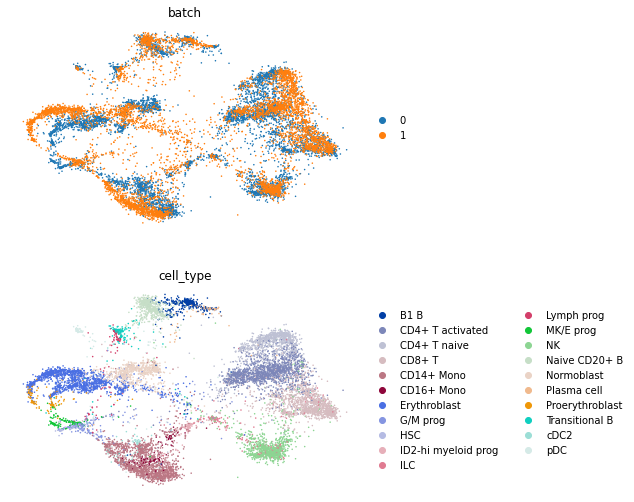

In [21]:
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["batch", 'cell_type'],
    frameon=False,
    ncols=1,
)

/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/nina.sander/miniconda3/envs/gex/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


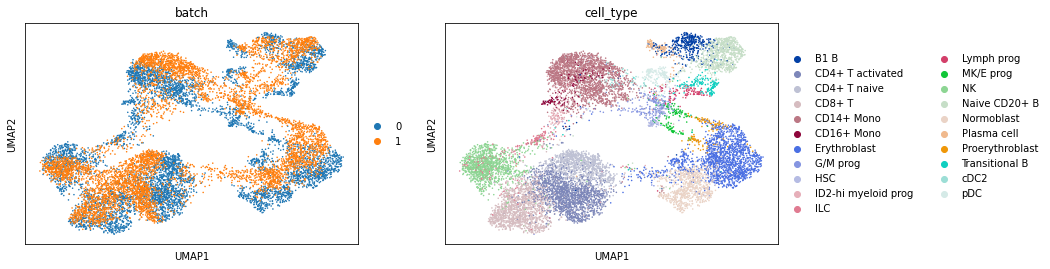

In [20]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')
sc.tl.umap(adata)
sc.pl.umap(adata, color=('batch','cell_type'))

In [36]:
adata.raw.X.shape

(12448, 1315)

In [22]:
adata.write("gene_activity_scvi.h5ad")